In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline 

from evo.tools import log
log.configure_logging(verbose=False, debug=False, silent=False)

import pprint
import numpy as np

from evo.tools import plot
import matplotlib.pyplot as plt

# temporarily override some package settings
from evo.tools.settings import SETTINGS
SETTINGS.plot_usetex = False

plot.apply_settings(SETTINGS)
%matplotlib inline

from evo.tools import file_interface
from evo.core import metrics
from evo.core.units import Unit

#### run-1-wheelchair-mapping v. run-2-wheelchair-query

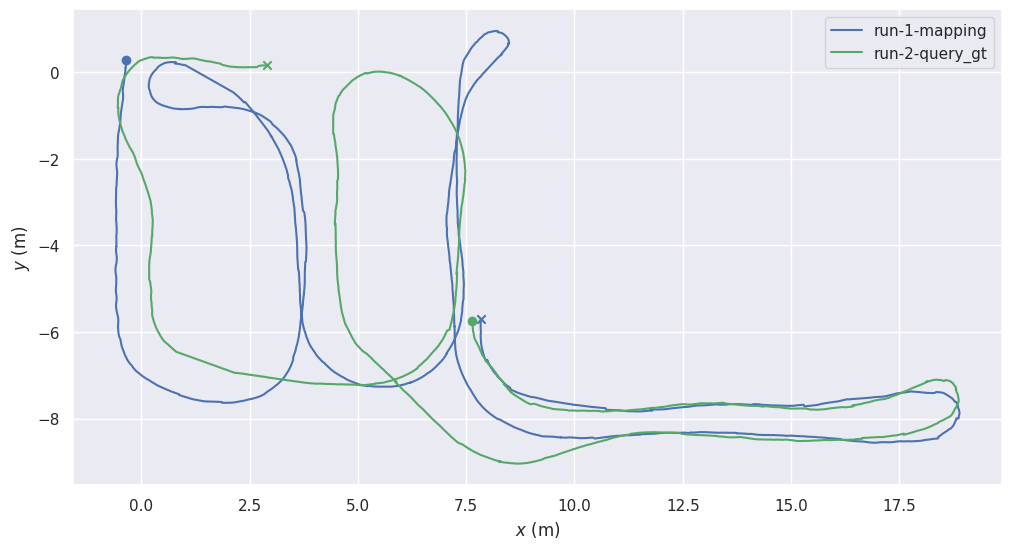

In [4]:
tum_mapping_file = "../../../../../../scratch/toponavgroup/indoor-topo-loc/datasets/rrc-lab-data/wheelchair-runs-20241220/run-1-wheelchair-mapping/poses_camera_tum.txt"
query_gt_file = "../../../../../../scratch/toponavgroup/indoor-topo-loc/datasets/rrc-lab-data/wheelchair-runs-20241220/run-2-wheelchair-query/poses_camera_tum.txt"

tum_mapping = file_interface.read_tum_trajectory_file(tum_mapping_file)
tum_query_gt = file_interface.read_tum_trajectory_file(query_gt_file)

fig = plt.figure(figsize=(10, 20))
traj_by_label = {
    "run-1-mapping": tum_mapping,
    "run-2-query_gt": tum_query_gt,
}

plot.trajectories(fig, traj_by_label, plot.PlotMode.xy, plot_start_end_markers=True)
plt.show()


100%|██████████| 2468/2468 [00:00<00:00, 192809.24it/s]


Retrieved ref poses: 2152


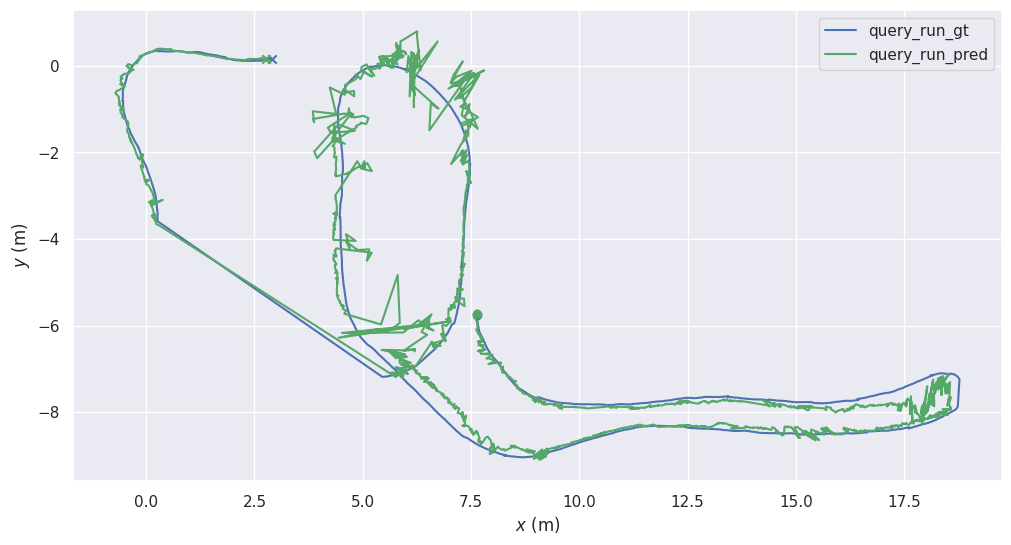

In [10]:
from tqdm import tqdm


EXP_NAME = "run-2-oracle-roma"
BASE_PATH = Path("../../../../../../scratch/dynrecon/exps")

retrieved_ref_poses_file = BASE_PATH / f"retrieved_trajectory_tum/{EXP_NAME}.txt"
pred_poses_file_tum = BASE_PATH / f"pred_trajectory_tum/{EXP_NAME}.txt"
retrieval_data = np.loadtxt(retrieved_ref_poses_file, delimiter=' ')    
query_data = np.loadtxt(query_gt_file, delimiter=' ')

# Lists to store filtered poses
retrieved_ref_poses = []
filtered_query_poses = []

valid_query_indices = retrieval_data[:, 0]

for query_pose in tqdm(query_data):
    query_idx = int(query_pose[0])
    
    # Check if this query index exists in our retrieval results
    if query_idx in valid_query_indices:
        match_idx = np.where(retrieval_data[:, 0] == query_idx)[0][0]
        query_retrieval = retrieval_data[match_idx]
        
        # [timestamp, tx, ty, tz, qx, qy, qz, qw]
        retrieved_ref_poses.append(query_retrieval)
        filtered_query_poses.append(query_pose)

# Convert lists to numpy arrays
retrieved_ref_poses = np.array(retrieved_ref_poses)
filtered_query_poses = np.array(filtered_query_poses)
# write poses to file in tum format with timestamps as index
def write_tum_poses(file_path, poses):
    with open(file_path, 'w') as f:
        # simply write the poses as they are
        for pose in poses:
            f.write(" ".join(map(str, pose)) + "\n")

retrieved_ref_poses_file = BASE_PATH / f"retrieved_trajectory_tum/{EXP_NAME}.txt"
filtered_query_poses_file = BASE_PATH / f"filtered_query_poses_tum/{EXP_NAME}.txt"

write_tum_poses(retrieved_ref_poses_file, retrieved_ref_poses)
write_tum_poses(filtered_query_poses_file, filtered_query_poses)

print(f"Retrieved ref poses: {len(retrieved_ref_poses)}")

tum_retrieved = file_interface.read_tum_trajectory_file(retrieved_ref_poses_file)
tum_query_gt = file_interface.read_tum_trajectory_file(filtered_query_poses_file)
tum_query_pred = file_interface.read_tum_trajectory_file(pred_poses_file_tum)

fig = plt.figure(figsize=(10, 20))
traj_by_label = {
    # "tum_retrieved": tum_retrieved, 
    "query_run_gt": tum_query_gt,
    "query_run_pred": tum_query_pred,
}

plot.trajectories(fig, traj_by_label, plot.PlotMode.xy, plot_start_end_markers=True)
plt.show()


100%|██████████| 2468/2468 [00:00<00:00, 207707.97it/s]


Retrieved ref poses: 2468


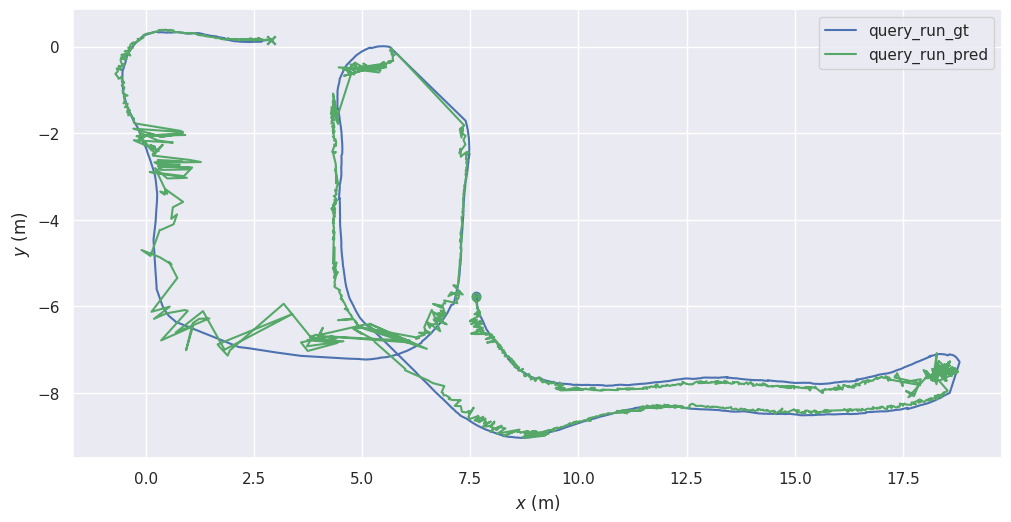

In [16]:
EXP_NAME = "run-2-dinov2-roma"
BASE_PATH = Path("../../../../../../scratch/dynrecon/exps")

retrieved_ref_poses_file = BASE_PATH / f"retrieved_trajectory_tum/{EXP_NAME}.txt"
pred_poses_file_tum = BASE_PATH / f"pred_trajectory_tum/{EXP_NAME}.txt"
pred_data = np.loadtxt(pred_poses_file_tum, delimiter=' ')    
query_data = np.loadtxt(query_gt_file, delimiter=' ')

# Lists to store filtered poses
pred_poses = []
filtered_query_poses = []

valid_query_indices = pred_data[:, 0]

for query_pose in tqdm(query_data):
    query_idx = int(query_pose[0])
    
    # Check if this query index exists in our retrieval results
    if query_idx in valid_query_indices:
        match_idx = np.where(pred_data[:, 0] == query_idx)[0][0]
        query_pred = pred_data[match_idx]
        
        # [timestamp, tx, ty, tz, qx, qy, qz, qw]
        pred_poses.append(query_pred)
        filtered_query_poses.append(query_pose)

# Convert lists to numpy arrays
pred_poses = np.array(pred_poses)
filtered_query_poses = np.array(filtered_query_poses)
# write poses to file in tum format with timestamps as index
def write_tum_poses(file_path, poses):
    with open(file_path, 'w') as f:
        # simply write the poses as they are
        for pose in poses:
            f.write(" ".join(map(str, pose)) + "\n")

retrieved_ref_poses_file = BASE_PATH / f"retrieved_trajectory_tum/{EXP_NAME}.txt"
filtered_query_poses_file = BASE_PATH / f"filtered_query_poses_tum/{EXP_NAME}.txt"

write_tum_poses(retrieved_ref_poses_file, retrieved_ref_poses)
write_tum_poses(filtered_query_poses_file, filtered_query_poses)

print(f"Retrieved ref poses: {len(retrieved_ref_poses)}")

tum_retrieved = file_interface.read_tum_trajectory_file(retrieved_ref_poses_file)
tum_query_gt = file_interface.read_tum_trajectory_file(filtered_query_poses_file)
tum_query_pred = file_interface.read_tum_trajectory_file(pred_poses_file_tum)

fig = plt.figure(figsize=(10, 20))
traj_by_label = {
    # "tum_retrieved": tum_retrieved, 
    "query_run_gt": tum_query_gt,
    "query_run_pred": tum_query_pred,
}

plot.trajectories(fig, traj_by_label, plot.PlotMode.xy, plot_start_end_markers=True)
plt.show()


In [ ]:
import json
pose_relation = metrics.PoseRelation.translation_part
data = (tum_query_gt, tum_query_pred)

ape_metric = metrics.APE(pose_relation)
ape_metric.process_data(data)

ape_stats = ape_metric.get_all_statistics()
pprint.pprint(ape_stats)
# # save ape stats as json
# ape_stats_file = exp_folder / "ape_stats.json"
# with open(ape_stats_file, 'w') as f:
#     json.dump(ape_stats, f, indent=4)

fig = plt.figure()
plot.error_array(fig.gca(), ape_metric.error,
                statistics={s:v for s,v in ape_stats.items() if s != "sse"},
                name="APE", title="APE w.r.t. " + ape_metric.pose_relation.value, xlabel="$t$ (s)")
plt.show()

{'max'

: np.float64(2.069084241607216),
 'mean': 0.2196166664229995,
 'median': np.float64(0.13975346593196486),
 'min': np.float64(0.008466662012401174),
 'rmse': 0.34370526118879524,
 'sse': np.float64(230.71434772897956),
 'std': 0.2643895353415239}


NameError: name 'exp_folder' is not defined